----------------------------------

# <span style="color:blueviolet"> 👩‍💻 DATA EDA <span style ="font-family:Papyrus;"> with python </span>
----------------------------------

<span style="background-color:#F5F5F5"> **🚩 강의 개요** <br> </span> 
- python 이 어떠한 언어인지 이해합니다. 
- python 의 library 의 개념을 이해하고 실습합니다. 
- kaggle dataset 을 활용한 전반적인 EDA 를 진행합니다.
- 모든 회차에서 실습 코드를 제공합니다.
- 이론 비중 30%, 코드실습 비중 70%

<span style="background-color:#F5F5F5"> **🚩 실습 커리큘럼** <br> </span> 
- python, 라이브러리 개념학습 및 실습환경 준비 
- python 활용 테이블 결합
- python 활용 데이터 이상치, 결측치 처리 
- python 활용 데이터 시각화 ✅
</span> 
  
  

-----------------------------------

## <span style="color:red"> 📌 chapter 1. 데이터시각화 - matplotlib

#### <span style="color:blue"> **📘 1-1. 라이브러리 import** </span>

In [1]:
import pandas as pd 
import numpy as np
import time
from PIL import Image
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt 
import datapane as dp
import os
# seaborn 팔레트 설정
palette = sns.color_palette("pastel")

import warnings
# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

#### <span style="color:blue"> **📘 1-2. CSV 파일을 통한 테이블 LOAD** </span>

In [2]:
os.chdir('/Users/jun/GitStudy/Data_4/Data/eCommerce2')

In [3]:
# pandas 라이브러리를 활용한 csv 파일 읽기 
df = pd.read_csv("product_details.csv") # product_details.csv
df2 = pd.read_csv("customer_details.csv") # customer_details.csv
df3 = pd.read_csv("E-commerece sales data 2024.csv") # E-commerece sales data 2024.csv

#### <span style="color:blue"> **📘 1-3. 기본 그래프 그리기** </span>

In [4]:
# 결측치 제거하기
df2 = df2.dropna()

In [5]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


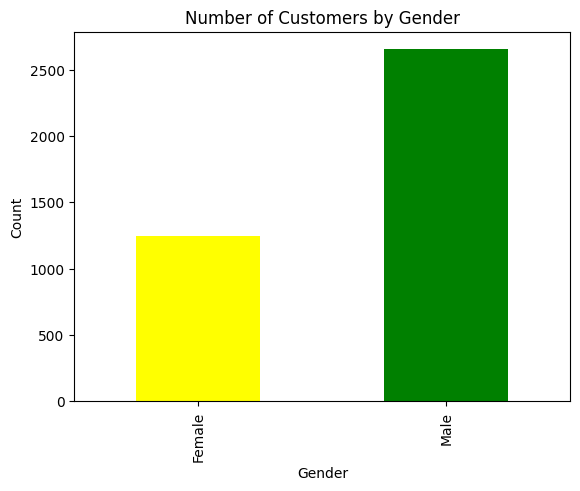

In [6]:
# python 내장함수 plot 사용하기
# 성별 유저수 막대그래프
# 막대그래프


import matplotlib.pyplot as plt
df2.groupby('Gender')['Customer ID'].count().plot.bar(color=['yellow','green'])
plt.title('Number of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### <span style="color:blue"> **📘 1-4. 라인그래프 그리기** </span>

In [7]:
# dataframe 컬럼 확인하기 
df2.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
# 카테고리별 유저수 구하기 
# 인덱스 가리기: .style.hide_index() : 사용하면 그래프를 그릴 수 없습니다. 참고해주세요
d1 = df2.groupby('Category')['Customer ID'].count().reset_index()

In [9]:
d1

,Category,Customer ID
0,Accessories,1240
1,Clothing,1737
2,Footwear,599
3,Outerwear,324


Text(0, 0.5, 'usercnt')

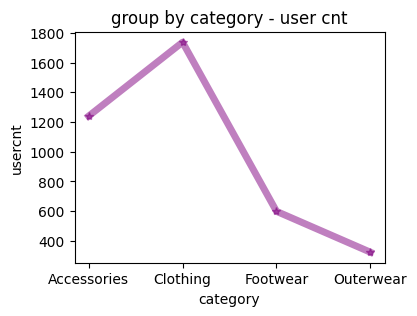

In [10]:
# matplotlib 라이브러리를 통한 그래프 그리기
# figure 함수를 이용하여, 전체 그래프 사이즈 조정 
dplot1 = plt.figure(figsize = (4 , 3))

# x축, y축 설정
x=d1['Category']
y=d1['Customer ID']

# 그래프 그리기 
# 보라색, * 으로 데이터포인트 표시, 투명도=50%, 라인 굵기 5
plt.plot(x, y, color='purple', marker='*', alpha=0.5, linewidth=5)

plt.title("group by category - user cnt")
plt.xlabel("category")
plt.ylabel("usercnt")

#### <span style="color:blue"> **📘 1-5. 막대그래프 그리기** </span>

In [11]:
# 카테고리, 성별 유저수 구하기 
# stack 은 pivot 테이블과 비슷하게, 데이터프레임을 핸들링하는 데 주로 사용됩니다. 
# 반대로 인덱스를 컬럼으로 풀어주는 unstack 이 있습니다. 
d2 = df2.groupby(['Category','Gender'])['Customer ID'].count().unstack(1)# 성별이 컬럼으로

In [12]:
d2

Gender,Female,Male
Category,,
Accessories,392,848
Clothing,556,1181
Footwear,199,400
Outerwear,101,223


Text(0, 0.5, 'usercnt')

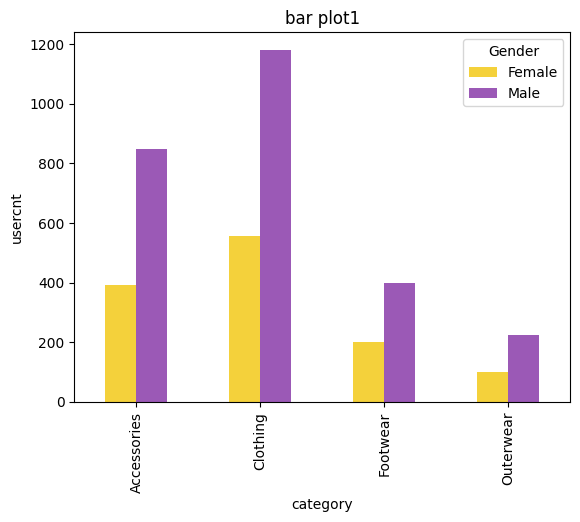

In [13]:
# python 내장함수 plot 사용하기
# 막대 그래프, 컬러는 hex code 를 사용하여 지정할 수 있습니다. 
# hex code 찾기: https://html-color-codes.info/
dplot8 = d2.plot(kind='bar',color=['#F4D13B','#9b59b6'])
plt.title("bar plot1")
plt.xlabel("category")
plt.ylabel("usercnt")

#### <span style="color:blue"> **📘 1-6. 누적 막대그래프 그리기** </span>

Text(0, 0.5, 'usercnt')

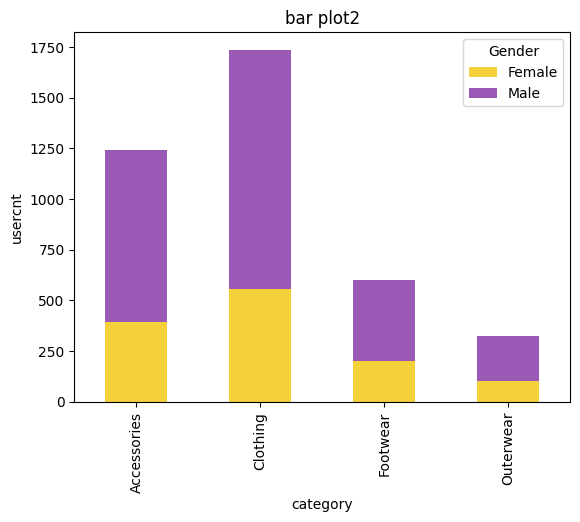

In [14]:
# python 내장함수 plot 사용하기
# 카테고리, 성별 유저수 구하기 
# stacked=True 로 설정하면 누적그래프를 그릴 수 있습니다. 
dplot9 = d2.plot(kind='bar', stacked=True, color=['#F4D13B','#9b59b6'])
plt.title("bar plot2")
plt.xlabel("category")
plt.ylabel("usercnt")

#### <span style="color:blue"> **📘 1-7. 파이차트 그리기** </span>

In [15]:
# 성별 비중 구하기
piedf = df2.groupby('Gender')['Customer ID'].count().reset_index()

In [16]:
piedf

,Gender,Customer ID
0,Female,1248
1,Male,2652


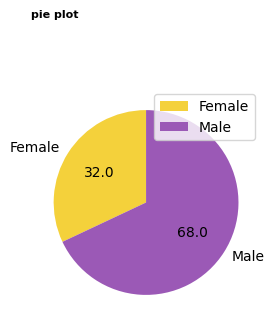

In [17]:
# matplotlib 라이브러리를 통한 그래프 그리기
# 파이차트 그리기 
# labels 옵션을 통해 그룹값을 표현해줄 수 있습니다. 
dplot7= plt.figure(figsize=(3,3))
plt.pie(
    x=piedf['Customer ID'], 
    labels=piedf['Gender'],
    # 소수점 첫째자리까지 표시
    autopct='%1.1f',
    colors=['#F4D13B','#9b59b6'],
    startangle=90
)
# 범례 표시하기 
plt.legend(piedf['Gender'])
# 타이틀명, 타이틀 위치 왼쪽, 타이틀 여백 50, 글자크기, 굵게 설정 
plt.title("pie plot", loc="left", pad=50, fontsize=8, fontweight="bold")
plt.show()

#### <span style="color:blue"> **📘 1-8. 산점도 그리기** </span>

In [18]:
# 나이와 평균 결제금액 분포 나타내기 
d3 = df2.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

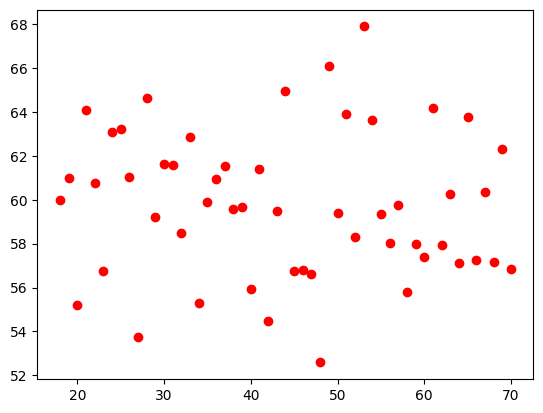

In [19]:
# matplotlib 라이브러리를 통한 그래프 그리기
# x축: 나이 / y축: 구매금액, 데이터 포인트 색상: red 
plt.scatter(d3['Age'],d3['Purchase Amount (USD)'], c="red")

#### <span style="color:blue"> **📘 1-9. 이중축 그래프 그리기** </span>

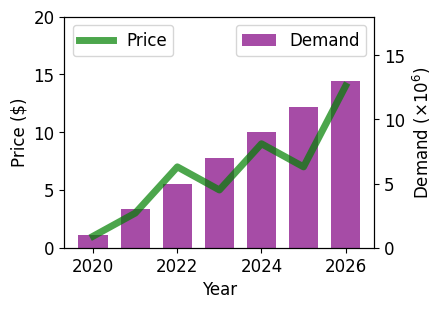

In [20]:
# matplotlib 라이브러리와 내장함수를 통한 그래프 그리기
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기- line 그래프 
# subplot 모듈을 사용하면 여러 개의 그래프를 동시에 시각화할 수 있습니다.
# 전체 도화지를 그려주고(figure) 위치에 각 그래프들을 배치한다고 이해해주세요.
fig, ax1 = plt.subplots()

# 라인 그래프
# 선 색상 초록, 굵기 5, 투명도 70%, 축 이름: Price
ax1.plot(x, y1, color='green', linewidth=5, alpha=0.7, label='Price')
# y 축 범뮈 설정
ax1.set_ylim(0, 20)
# y 축 이름 설정
ax1.set_ylabel('Price ($)')
# x 축 이름 설정
ax1.set_xlabel('Year')


# 3. 그래프 그리기- bar 그래프 
# x축 공유(즉, 이중축 사용 의미)
ax2 = ax1.twinx()
# 막대 보라색, 투명도 70%, 막대 넓이 0.7 
ax2.bar(x, y2, color='purple', label='Demand', alpha=0.7, width=0.7)
# y 축 범뮈 설정
ax2.set_ylim(0, 18)
# y 축 이름 설정
ax2.set_ylabel(r'Demand ($\times10^6$)')

# 레이블 위치 
# 클수록 가장 위쪽에 보여진다고 생각하면 됨. 
# ax2.set_zorder(ax1.get_zorder() + 10) 와 비교해보세요! 
ax1.set_zorder(ax2.get_zorder() + 20)
ax1.patch.set_visible(False)

# 범례 지정, 위치까지 함께 
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

#### <span style="color:blue"> **📘 1-10. 피라미드 그래프 그리기** </span>

In [21]:
# matplotlib 라이브러리를 통한 그래프 그리기
# 나이대별 성별 유저수 구하기 
# 피라미드 차트 그리기 
# 나이 구간 설정
bins2 = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# cut 활용 절대구간 나누기 
# bins 파라미터는 데이터를 나눌 구간의 경계를 정의 
# [0, 4, 8, 12, 24]는 0~4, 4~8, 8~12, 12~24의 네 구간으로 데이터를 나누겠다는 의미

df2["bin"] = pd.cut(df2["Age"], bins = bins2)

# apply 와 lambda 를 활용한 전체 컬럼에 대한 나이 구간 컬럼 추가하기 
#15는 15-20 으로 반환됨 
df2["age"] = df2["bin"].apply(lambda x: str(x.left) + " - " + str(x.right))


In [22]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,bin,age
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,"(50, 55]",50 - 55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,"(15, 20]",15 - 20
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,"(45, 50]",45 - 50
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,"(20, 25]",20 - 25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,"(40, 45]",40 - 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,"(35, 40]",35 - 40
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,"(50, 55]",50 - 55
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,"(45, 50]",45 - 50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,"(40, 45]",40 - 45


In [23]:
# 나이와 성별 두 컬럼을 기준으로 유저id 를 count 하고 인덱스 재정렬
df7 = df2.groupby(['age','Gender'])['Customer ID'].count().reset_index()

# 계산한 결과를 바탕으로 피벗테이블 구현 
df7 = pd.pivot_table(df7, index='age', columns='Gender', values='Customer ID').reset_index()


In [24]:
# 피라미드 차트 구현을 위한 대칭 형태 만들어주기 
df7["Female_Left"] = 0
df7["Female_Width"] = df7["Female"]
df7["Male_Left"] = -df7["Male"]
df7["Male_Width"] = df7["Male"]

In [25]:
df7

Gender,age,Female,Male,Female_Left,Female_Width,Male_Left,Male_Width
0,10 - 15,0,0,0,0,0,0
1,15 - 20,59,153,0,59,-153,153
2,20 - 25,114,245,0,114,-245,245
3,25 - 30,122,256,0,122,-256,256
4,30 - 35,120,244,0,120,-244,244
5,35 - 40,117,244,0,117,-244,244
6,40 - 45,126,242,0,126,-242,242
7,45 - 50,132,250,0,132,-250,250
8,50 - 55,114,257,0,114,-257,257
9,55 - 60,116,266,0,116,-266,266


Text(0.5, 1.0, 'Pyramid plot')

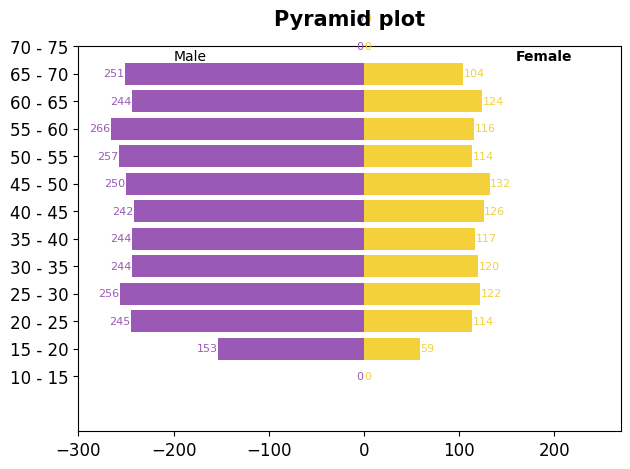

In [26]:
# matplotlib 라이브러리를 통한 그래프 그리기
dplot6 = plt.figure(figsize=(7,5))

# 수평막대 그리기 barh사용. 색상과 라벨 지정 
plt.barh(y=df7["age"], width=df7["Female_Width"], color="#F4D13B", label="Female")
plt.barh(y=df7["age"], width=df7["Male_Width"], left=df7["Male_Left"],color="#9b59b6", label="Male")

# x 축과 y 축 범위 지정
plt.xlim(-300,270)
plt.ylim(-2,12)
plt.text(-200, 11.5, "Male", fontsize=10)
plt.text(160, 11.5, "Female", fontsize=10, fontweight="bold")

# 그래프에 값 표시하기 
# 해당 구문을 없애고 실행해보세요! 
# 외울 필요는 없습니다. 
# plt.text()는 그래프의 특정 위치에 텍스트를 표시
# 텍스트를 표시할 위치 설정 
# x=df7["Male_Left"][idx]-0.5: x좌표는 df7의 "Male_Left" 열의 값에서 0.5를 뺀 위치
# y=idx: y좌표는 현재 인덱스 (idx)로 설정되어, y축 방향으로 각 인덱스 위치에 텍스트 표시 
# s="{}".format(df7["Male"][idx]): 표시할 텍스트는 df7의 "Male" 열에 있는 값을 문자열로 변환
# ha="right": 텍스트의 수평 정렬 오른쪽
# va="center": 텍스트의 수직 정렬 중앙
for idx in range(len(df7)):
    # 남성 데이터 텍스트로 추가 
    plt.text(x=df7["Male_Left"][idx]-0.5, y=idx, s="{}".format(df7["Male"][idx]),
            ha="right", va="center",
            fontsize=8, color="#9b59b6")
    # 여성 데이터 텍스트로 추가 
    plt.text(x=df7["Female_Width"][idx]+0.5, y=idx, s="{}".format(df7["Female"][idx]),
            ha="left", va="center",
            fontsize=8, color="#F4D13B")
# 타이틀 지정. 이름, 위치, 여백, 폰트사이즈, 굵게 설정 
plt.title("Pyramid plot", loc="center", pad=15, fontsize=15, fontweight="bold")

#### <span style="color:blue"> **📘 1-11. 여러개의 그래프 그리기** </span>

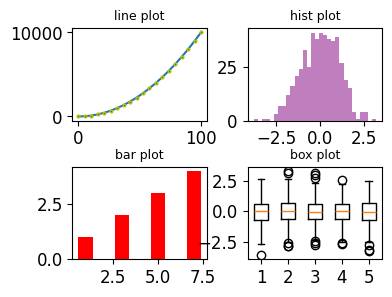

In [27]:
#figure,ax 만들기
fig,ax=plt.subplots(2,2)

#그래프 그리기
ax[0,0].plot(np.linspace(0,100,20),np.linspace(0,100,20)**2, marker='o', markersize=2, markeredgecolor='y')
ax[0,1].hist(np.random.randn(500), bins=30, color='purple', alpha=0.5)
ax[1,0].bar([1,3,5,7],np.array([1,2,3,4]),color='r')
ax[1,1].boxplot(np.random.randn(500,5))# 표준정규분포 임의로 생성 

#그래프 사이 간격 추가
fig.subplots_adjust(hspace=0.5,wspace=0.3)

#그래프별 타이틀 추가
ax[0,0].set_title("line plot", fontsize=9) 
ax[0,1].set_title("hist plot", fontsize=9)  
ax[1,0].set_title("bar plot", fontsize=9)  
ax[1,1].set_title("box plot", fontsize=9)  
plt.show()

## <span style="color:red"> 📌 chapter 2. 데이터시각화 - seaborn

#### <span style="color:blue"> **📘 2-1. 바 그래프 그리기** </span>

In [28]:
#성별 유저수 구하기
df33 = df2.groupby('Gender')['Customer ID'].count().reset_index()

In [29]:
df33

,Gender,Customer ID
0,Female,1248
1,Male,2652


Text(0.5, 1.0, 'User - bar chart')

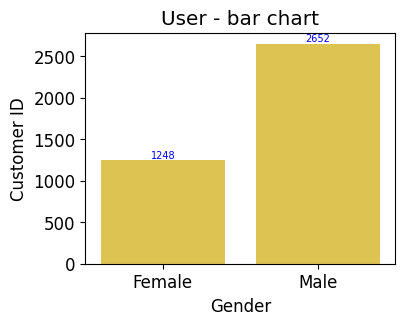

In [30]:
# seaborn 라이브러리를 통한 그래프 그리기 
p = ["#F4D13B","red"]
sns.set_palette(p)

plot1 = (sns.barplot(data=df33,x= "Gender",y= "Customer ID"))
# containers: 각 막대 / labels: 각 막대의 높이를 텍스트로 반환 
plot1.bar_label(plot1.containers[0], labels=df33['Customer ID'], fontsize=7, color='blue')
plot1.set_title("User - bar chart")

#### <span style="color:blue"> **📘 2-2. 바 그래프 그리기2** </span>

In [31]:
# seaborn 라이브러리를 통한 그래프 그리기 
# 월별 유저수 구하기
mask2 = (df3['Time stamp']>' ')

In [32]:
# 시간이 있는 데이터 필터링
df8 = df3[mask2]

In [33]:
# 시간별로 유저수 카운트
df8.groupby('Time stamp')['user id'].count()

Time stamp
01/01/2023 0:00     18
01/01/2023 10:00    18
01/02/2023 10:00     6
01/03/2023 10:00     4
01/04/2023 10:00     4
                    ..
31/05/2023 10:00     4
31/07/2023 10:00     3
31/08/2023 10:00     3
31/10/2023 8:00     20
31/12/2022 10:00    18
Name: user id, Length: 366, dtype: int64

In [34]:
# inner join 시행 
merge_df = pd.merge(df2,df8, how='inner', left_on='Customer ID', right_on='user id')

In [35]:
df8.dtypes

user id             float64
product id           object
Interaction type     object
Time stamp           object
Unnamed: 4          float64
dtype: object

In [36]:
# object -> datetime 
df8['Date'] = pd.to_datetime(df8['Time stamp']).dt.strftime('%Y-%m')

In [37]:
# 월별 유저수 카운트 
df9 = df8.groupby('Date')['user id'].count().reset_index()

In [38]:
# 컬럼명 변경, 기존 dataframe 덮어씌움
df9.rename(columns = {'user id' : 'user count'}, inplace = True)

In [39]:
df9

,Date,user count
0,2022-12,72
1,2023-01,335
2,2023-02,163
3,2023-03,165
4,2023-04,161
5,2023-05,165
6,2023-06,160
7,2023-07,146
8,2023-08,145
9,2023-09,139


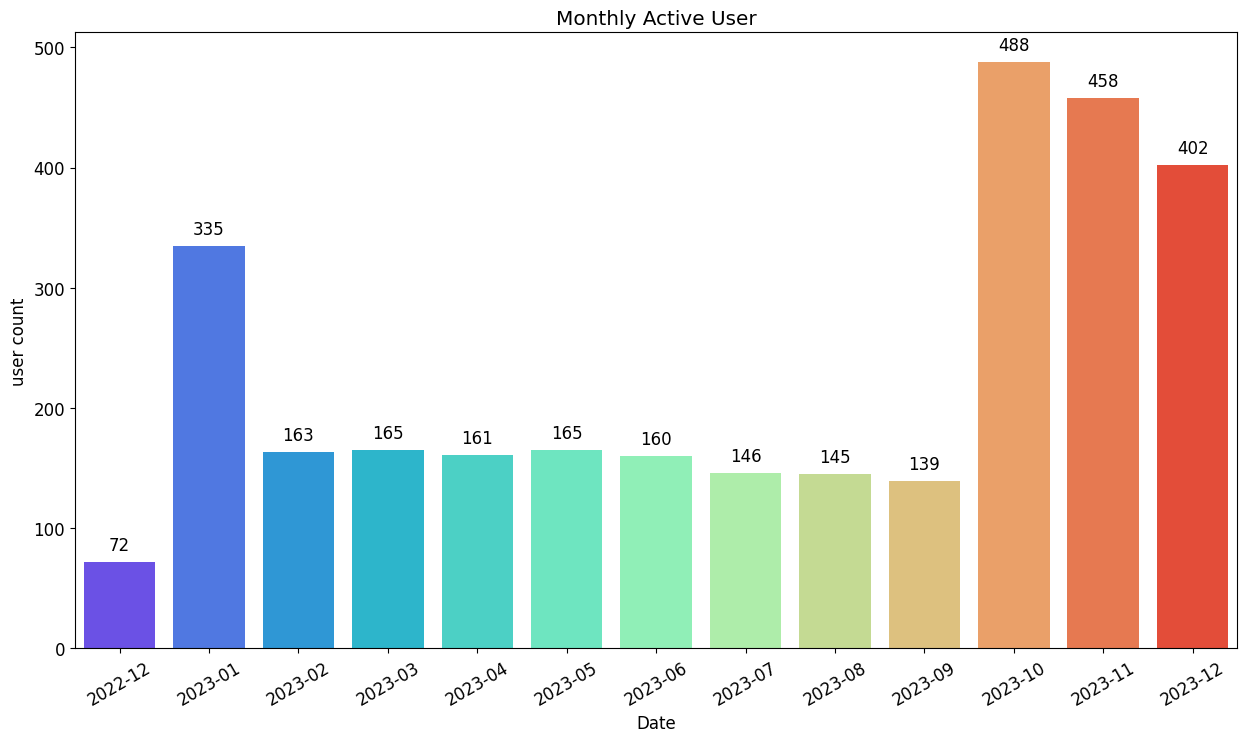

In [40]:
# seaborn 라이브러리를 통한 그래프 그리기 
plt.figure(figsize=(15, 8))
dplot1 = sns.barplot(x="Date", y="user count", data=df9, palette='rainbow')
dplot1.set_xticklabels(dplot1.get_xticklabels(), rotation=30)
dplot1.set(title='Monthly Active User') # title barplot

# 바차트에 텍스트 추가하기 
# patches 는 각 막대를 의미 .
for p in dplot1.patches:
    # 각 바의 높이 구하기
    height = p.get_height()
    # X 축 시작점으로부터, 막대넓이의 중앙 지점에 텍스트 표시 
    dplot1.text(x = p.get_x()+(p.get_width()/2), 
    # 각 막대 높이에 10 을 더해준 위치에 텍스트 표시             
    y = height+10, 
    # 값을 정수로 포맷팅
    s = '{:.0f}'.format(height),
    # 중앙 정렬
    ha = 'center') 

#### <span style="color:blue"> **📘 2-3. 카운트그래프 그리기** </span>

[Text(0.5, 1.0, 'bar plot3')]

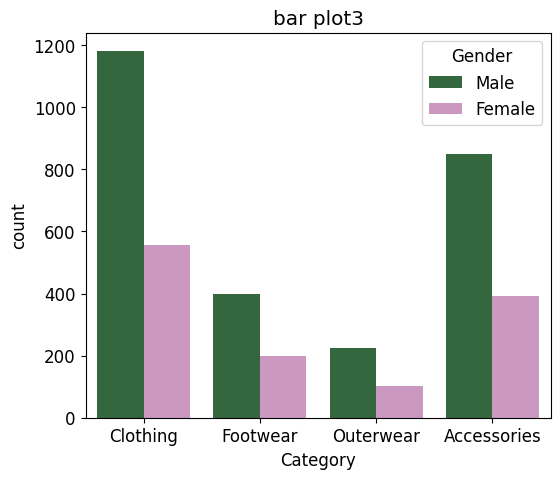

In [41]:
# seaborn 라이브러리를 통한 그래프 그리기 
# 시즌별 카테고리별 유저수(count 값과 동일) 구하기 
plt.figure(figsize=(6, 5))
# hue 는 범례입니다. 
dplot2 = sns.countplot(x='Category', hue='Gender', data=df2, palette='cubehelix')
dplot2.set(title='bar plot3')

#### <span style="color:blue"> **📘 2-4. 히스토그램 그래프 그리기** </span>

<Axes: xlabel='Age', ylabel='Count'>

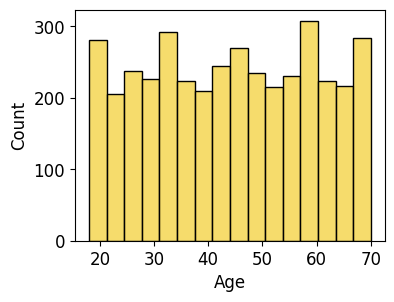

In [42]:
# seaborn 라이브러리를 통한 그래프 그리기 
#나이별 데이터 count 나타내기 
#분포를 나타내는 그래프로 데이터 갯수를 세어 표시

sns.histplot(x=df2['Age'])

#### <span style="color:blue"> **📘 2-5. 박스플롯 그리기** </span>

<Axes: xlabel='Purchase Amount (USD)'>

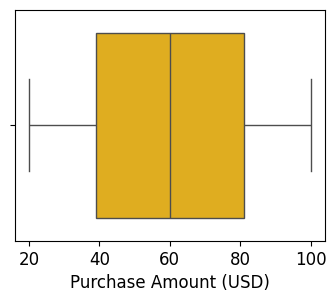

In [43]:
# seaborn 라이브러리를 통한 그래프 그리기 
# 최대(maximum), 최소(minimum), mean(평균), 1 사분위수(first quartile), 3 사분위수(third quartile)를 보기 위한 그래프
# 이상치 탐지에 용이(저번시간에 배운 IQR)
sns.boxplot(x = df2['Purchase Amount (USD)'],palette='Wistia')

[Text(0.5, 1.0, 'box plot yeah')]

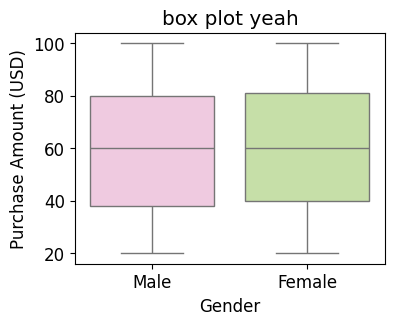

In [44]:
# seaborn 라이브러리를 통한 그래프 그리기 
# 박스플롯 응용
dplot5 = sns.boxplot(y = df2['Purchase Amount (USD)'], x = df2['Gender'], palette='PiYG')
dplot5.set(title='box plot yeah')

#### <span style="color:blue"> **📘 2-6. 상관관계 그래프 그리기** </span>

In [45]:
#연속형 변수 상관관계 히트맵 구현
df10 = df2[['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']]

In [46]:
df10.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [47]:
# 상관계수 구하기 
df10.corr()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


[Text(0.5, 1.0, 'corr plot')]

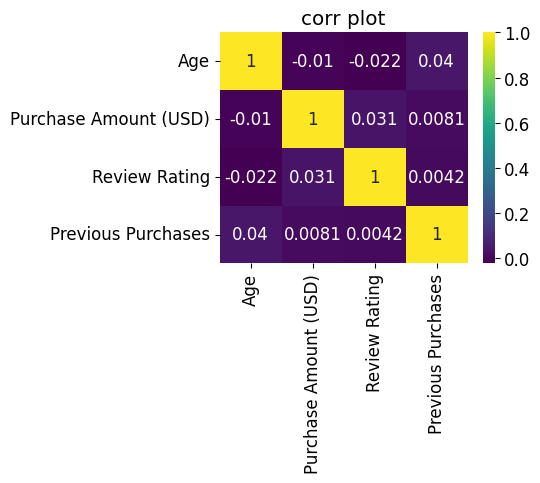

In [48]:
# seaborn 라이브러리를 통한 그래프 그리기 
# annot: 각 셀의 값 표기,camp 는 팔레트 
dplot10 = sns.heatmap(df10.corr(), annot = True, cmap = 'viridis') # camp =PiYG 도 넣어서 색상을 비교해보세요.
dplot10.set(title='corr plot')

#### <span style="color:blue"> **📘 2-7. 조인트 그래프 그리기** </span>

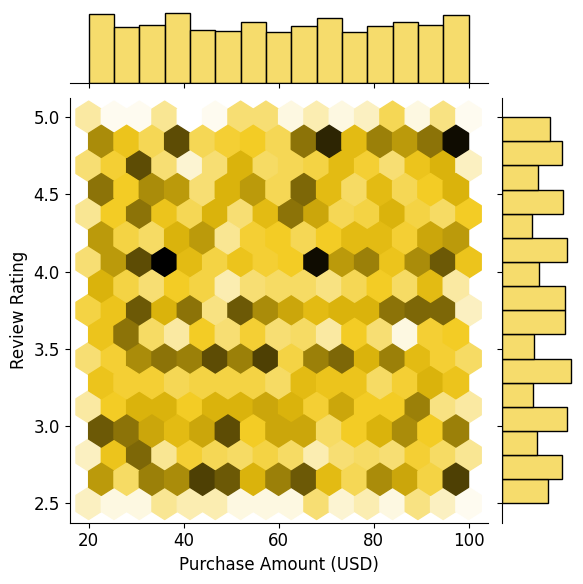

In [49]:
# seaborn 라이브러리를 통한 그래프 그리기 
#두 변수에 분포에 대한 분석시 사용
#hex 를 통해 밀도 확인
sns.jointplot(x=df2['Purchase Amount (USD)'], y=df10['Review Rating'], kind = 'hex', palette='cubehelix')

## <span style="color:red"> 📌 chapter 3. 데이터시각화 - Altair

#### <span style="color:blue"> **📘 3-1. 바 그래프 그리기** </span>

In [50]:
# altair 라이브러리를 통한 그래프 그리기 
# 월별 유저수 interactive 그래프 구현 
source=df9
alt.Chart(source).mark_bar().encode(
    x='Date',
    y='user count'
).interactive() # 동적 구현 

alt.Chart(...)

#### <span style="color:blue"> **📘 3-2. 파이차트 그리기** </span>

In [51]:
# altair 라이브러리를 통한 그래프 그리기 
source = df33
colors = ['#F4D13B','#9b59b6']
#innerRadius=50 >> 도넛차트의미 
dplot3 = (
alt.Chart(source).mark_arc(innerRadius=50).encode(
    theta="Customer ID",
    color="Gender",
    
).configure_range(category=alt.RangeScheme(colors))) # 컬러 반영하기 
dplot3.title = "donut plot" # 타이틀 설정 
dplot3

alt.Chart(...)

#### <span style="color:blue"> **📘 3-3. 동적 그래프 그리기** </span>

In [52]:
# altair 라이브러리를 통한 그래프 그리기 
#나이, 구매금액에 따른 남성/여성 유저수 확인하기
df5 = df2.groupby(['Age','Gender'])['Purchase Amount (USD)'].sum().reset_index()
df6 = df2.groupby(['Age','Gender'])['Customer ID'].count().reset_index()
merge_df =pd.merge(df5, df6, how='inner', on=['Age','Gender'])

In [53]:
merge_df

,Age,Gender,Purchase Amount (USD),Customer ID
0,18,Female,1194,20
1,18,Male,2945,49
2,19,Female,1675,27
3,19,Male,3266,54
4,20,Female,747,12
...,...,...,...,...
101,68,Male,3015,53
102,69,Female,1596,25
103,69,Male,3888,63
104,70,Female,1309,22


In [54]:
# altair 라이브러리를 통한 그래프 그리기 
source = merge_df
colors = ['pink','#9b59b6']

# 선택(드래그) 영역 설정 
brush = alt.selection_interval()
points = (alt.Chart(source).mark_point().encode(
    # Q: 양적 데이터 타입 / N: 범주형 데이터 타입 
    x='Age:Q',
    y='Purchase Amount (USD):Q',
    # 선택되지 않은 부분은 회색으로 처리 
    color=alt.condition(brush, 'Gender:N', alt.value('lightgray')),
).properties(  # 선택 가능영역 설정 
    width=1000,
    height=300
)
.add_params(brush)) # 산점도에 드래그 영역 추가하는 코드 

# 아래쪽 가로바차트 
bars = alt.Chart(source).mark_bar().encode(
    y='Gender:N',
    color='Gender:N',
    x='sum(Customer ID):Q'
).properties(
    width=1000,
    height=100
).transform_filter(brush) # 산점도에서 선택된 데이터만 필터링해 막대 그래프에 반영

#산점도와 막대 그래프를 수직으로 결합
dplot4 = (points & bars)

In [55]:
dplot4= dplot4.configure_range(category=alt.RangeScheme(colors))

In [56]:
dplot4

alt.VConcatChart(...)

In [57]:
#pip install pygwalker
import pygwalker as pyg
df2 = pd.read_csv("customer_details.csv") # customer_details.csv
walker = pyg.walk(df2)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062808b33db6469Q3fFrLVS2RzyJM4" style="height: auto">\n    <hea…

### PYTHON 세션까지 고생 많으셨습니다.

In [58]:
Image.open('명수아조시.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jun/GitStudy/Data_4/Data/eCommerce2/명수아조시.png'